# **Bagging Classifier**

## **Importing Libararies**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

## **Data Overview**

In [3]:
df = pd.read_csv('Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [5]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of      Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0     27      F      No         No              No                 Euthyroid   
1     34      F      No        Yes              No                 Euthyroid   
2     30      F      No         No              No                 Euthyroid   
3     62      F      No         No              No                 Euthyroid   
4     62      F      No         No              No                 Euthyroid   
..   ...    ...     ...        ...             ...                       ...   
378   72      M     Yes        Yes             Yes                 Euthyroid   
379   81      M     Yes         No             Yes                 Euthyroid   
380   72      M     Yes        Yes              No                 Euthyroid   
381   61      M     Yes        Yes             Yes  Clinical Hyperthyroidism   
382   67      M     Yes         No              No                 Euthyroid   

     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [8]:
df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [9]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

In [10]:
numerical_columns

['Age']

In [11]:
categorical_columns

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response',
 'Recurred']

In [12]:
categorical_columns = np.delete(categorical_columns, len(categorical_columns)-1)

## **Train Test Split**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Recurred']), df['Recurred'], 
                                                    test_size=0.2, 
                                                    random_state=42)

## **Preprocessing Data**

In [14]:
handle_numerical = Pipeline(steps=[
    ('impute_numerical', SimpleImputer(strategy='mean'))
])

In [15]:
handle_categorical = Pipeline(steps=[
    ('impute_numerical', SimpleImputer(strategy='most_frequent')),
    ('encode_categorical', OrdinalEncoder())
])

In [16]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('categorical', handle_categorical, categorical_columns)
], remainder='passthrough')

## **Separate Models**

In [17]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_svc = SVC(probability=True)

In [18]:
pipe_dt = make_pipeline(preprocessing, model_dt)
pipe_rf = make_pipeline(preprocessing, model_rf)
pipe_svc = make_pipeline(preprocessing, model_svc)

In [19]:
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_categorical',
                                                                   OrdinalEncoder())]),
                                                  array(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
       'Response'], dtype='<U20'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [20]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_categorical',
                                                                   OrdinalEncoder())]),
                                                  array(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
       'Response'], dtype='<U20'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [21]:
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_categorical',
                                                                   OrdinalEncoder())]),
                                                  array(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
       'Response'], dtype='<U20'))])),
                ('svc', SVC(probability=True))])

In [22]:
y_pred_dt = pipe_dt.predict(X_test)
y_pred_rf = pipe_rf.predict(X_test)
y_pred_svc = pipe_svc.predict(X_test)

In [23]:
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

          No       0.95      0.98      0.96        56
         Yes       0.95      0.86      0.90        21

    accuracy                           0.95        77
   macro avg       0.95      0.92      0.93        77
weighted avg       0.95      0.95      0.95        77



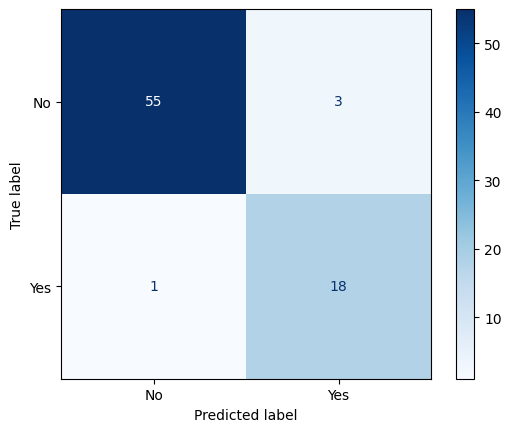

In [36]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_dt]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

In [24]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

          No       1.00      0.98      0.99        59
         Yes       0.95      1.00      0.97        18

    accuracy                           0.99        77
   macro avg       0.97      0.99      0.98        77
weighted avg       0.99      0.99      0.99        77



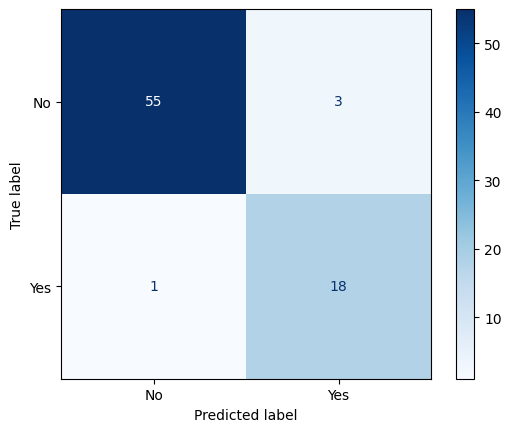

In [37]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_rf]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

In [25]:
print(classification_report(y_pred_svc, y_test))

              precision    recall  f1-score   support

          No       1.00      0.82      0.90        71
         Yes       0.32      1.00      0.48         6

    accuracy                           0.83        77
   macro avg       0.66      0.91      0.69        77
weighted avg       0.95      0.83      0.87        77



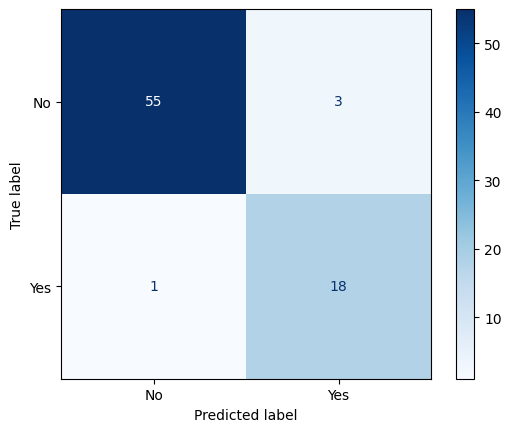

In [38]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_svc]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

## **Bagging Using Decision Tree**

In [26]:
bagging = BaggingClassifier(
    estimator= model_dt,
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [27]:
bag_pipe_dt = make_pipeline(preprocessing, bagging)

In [28]:
bag_pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_categorical',
                                                                   OrdinalEncoder())]),
                                                  array(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
       'Response'], dtype='<U20'))])),
                ('baggingclassifier',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=0.5, n_estimators=500,
                                   random_state=42))])

In [29]:
y_pred_bag_dt = bag_pipe_dt.predict(X_test)

In [30]:
print(classification_report(y_pred_bag_dt, y_test))

              precision    recall  f1-score   support

          No       1.00      0.98      0.99        59
         Yes       0.95      1.00      0.97        18

    accuracy                           0.99        77
   macro avg       0.97      0.99      0.98        77
weighted avg       0.99      0.99      0.99        77



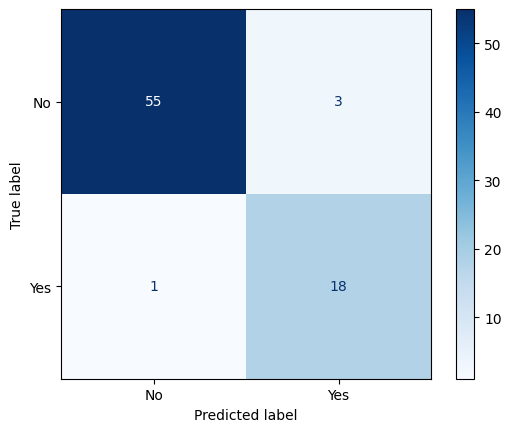

In [39]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_bag_dt]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

## **Bagging using Random Forest**

In [40]:
bagging = BaggingClassifier(
    estimator= model_rf,
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [41]:
bag_pipe = make_pipeline(preprocessing, bagging)

In [42]:
bag_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_categorical',
                                                                   OrdinalEncoder())]),
                                                  array(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
       'Response'], dtype='<U20'))])),
                ('baggingclassifier',
                 BaggingClassifier(estimator=RandomForestClassifier(),
                                   max_samples=0.5, n_estimators=500,
                                   random_state=42))])

In [43]:
y_pred_bag = bag_pipe.predict(X_test)

In [44]:
print(classification_report(y_pred_bag, y_test))

              precision    recall  f1-score   support

          No       1.00      0.97      0.98        60
         Yes       0.89      1.00      0.94        17

    accuracy                           0.97        77
   macro avg       0.95      0.98      0.96        77
weighted avg       0.98      0.97      0.97        77



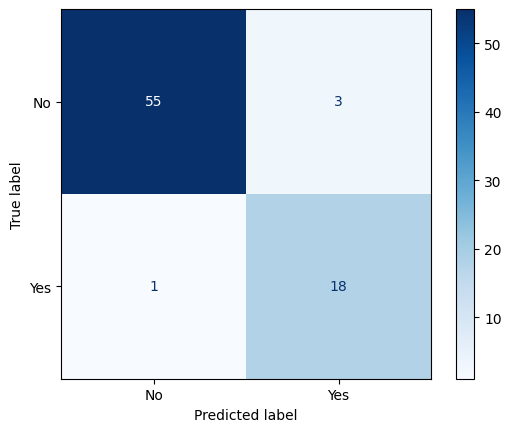

In [45]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_bag]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

## **Bagging using SVC**

In [46]:
bagging = BaggingClassifier(
    estimator= model_svc,
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [47]:
bag_pipe = make_pipeline(preprocessing, bagging)

In [48]:
bag_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_categorical',
                                                                   OrdinalEncoder())]),
                                                  array(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
       'Response'], dtype='<U20'))])),
                ('baggingclassifier',
                 BaggingClassifier(estimator=SVC(probability=True),
                                   max_samples=0.5, n_estimators=500,
                                   random_state=42))])

In [49]:
y_pred_bag = bag_pipe.predict(X_test)

In [50]:
print(classification_report(y_pred_bag, y_test))

              precision    recall  f1-score   support

          No       0.98      0.83      0.90        69
         Yes       0.37      0.88      0.52         8

    accuracy                           0.83        77
   macro avg       0.68      0.85      0.71        77
weighted avg       0.92      0.83      0.86        77



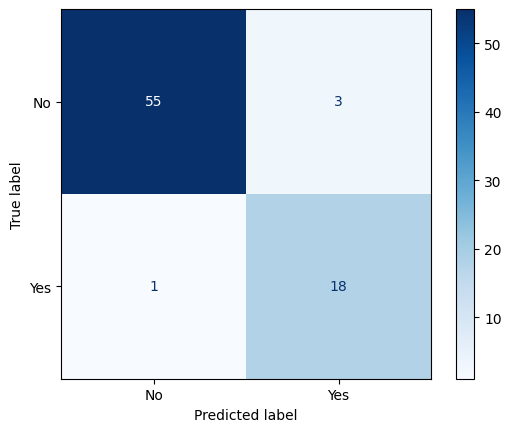

In [51]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_bag]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

## **Pasting using SVC**

In [52]:
bagging = BaggingClassifier(
    estimator= model_svc,
    n_estimators=500,
    max_samples=0.5,
    bootstrap=False,
    random_state=42
)

In [53]:
bag_pipe = make_pipeline(preprocessing, bagging)

In [54]:
bag_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_categorical',
                                                                   OrdinalEncoder())]),
                                                  array(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
       'Response'], dtype='<U20'))])),
                ('baggingclassifier',
                 BaggingClassifier(bootstrap=False,
                                   estimator=SVC(probability=True),
                                   max_samples=0.5, n_estimators=500,
                                   random_state=42))])

In [55]:
y_pred_bag = bag_pipe.predict(X_test)

In [56]:
print(classification_report(y_pred_bag, y_test))

              precision    recall  f1-score   support

          No       0.98      0.83      0.90        69
         Yes       0.37      0.88      0.52         8

    accuracy                           0.83        77
   macro avg       0.68      0.85      0.71        77
weighted avg       0.92      0.83      0.86        77



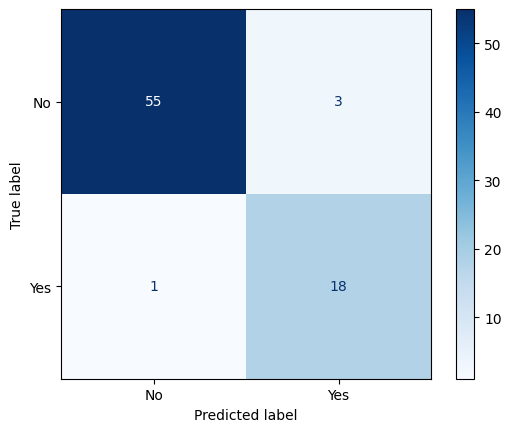

In [57]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_bag]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

## **Random Subspaces using SVC**

In [58]:
bagging = BaggingClassifier(
    estimator= model_svc,
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    random_state=42
)

In [59]:
bag_pipe = make_pipeline(preprocessing, bagging)

In [60]:
bag_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_categorical',
                                                                   OrdinalEncoder())]),
                                                  array(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
       'Response'], dtype='<U20'))])),
                ('baggingclassifier',
                 BaggingClassifier(bootstrap=False,
                                   estimator=SVC(probability=True),
                                   n_estimators=500, random_state=42))])

In [61]:
y_pred_bag = bag_pipe.predict(X_test)

In [62]:
print(classification_report(y_pred_bag, y_test))

              precision    recall  f1-score   support

          No       0.98      0.83      0.90        69
         Yes       0.37      0.88      0.52         8

    accuracy                           0.83        77
   macro avg       0.68      0.85      0.71        77
weighted avg       0.92      0.83      0.86        77



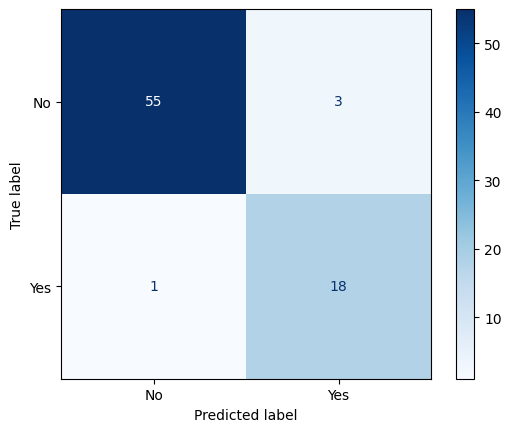

In [63]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_bag]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

## **Random Patches using SVC**

In [64]:
bagging = BaggingClassifier(
    estimator= model_svc,
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [65]:
bag_pipe = make_pipeline(preprocessing, bagging)

In [66]:
bag_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_categorical',
                                                                   OrdinalEncoder())]),
                                                  array(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
       'Response'], dtype='<U20'))])),
                ('baggingclassifier',
                 BaggingClassifier(estimator=SVC(probability=True),
                                   max_samples=0.5, n_estimators=500,
                                   random_state=42))])

In [67]:
y_pred_bag = bag_pipe.predict(X_test)

In [68]:
print(classification_report(y_pred_bag, y_test))

              precision    recall  f1-score   support

          No       0.98      0.83      0.90        69
         Yes       0.37      0.88      0.52         8

    accuracy                           0.83        77
   macro avg       0.68      0.85      0.71        77
weighted avg       0.92      0.83      0.86        77



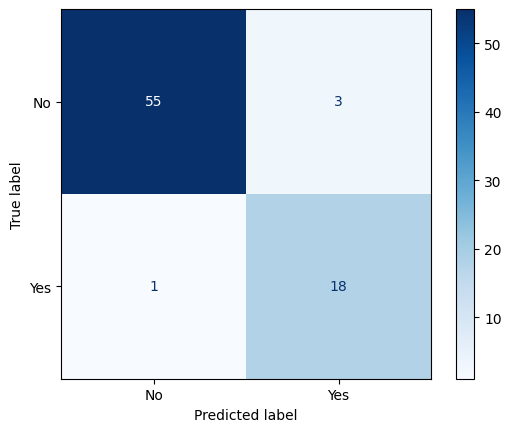

In [69]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_bag]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

## **OOB Score using SVC**

In [70]:
bagging = BaggingClassifier(
    estimator= model_svc,
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

In [71]:
bag_pipe = make_pipeline(preprocessing, bagging)

In [72]:
bag_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_categorical',
                                                                   OrdinalEncoder())]),
                                                  array(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
       'Response'], dtype='<U20'))])),
                ('baggingclassifier',
                 BaggingClassifier(estimator=SVC(probability=True),
                                   max_samples=0.5, n_estimators=500,
                                   oob_score=True, random_state=42))])

In [73]:
y_pred_bag = bag_pipe.predict(X_test)

In [74]:
print(classification_report(y_pred_bag, y_test))

              precision    recall  f1-score   support

          No       0.98      0.83      0.90        69
         Yes       0.37      0.88      0.52         8

    accuracy                           0.83        77
   macro avg       0.68      0.85      0.71        77
weighted avg       0.92      0.83      0.86        77



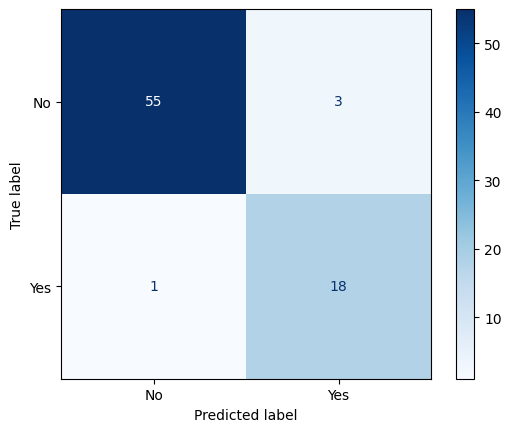

In [75]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_bag]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()